In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = sns.load_dataset('titanic')


df
#DATOS CLAVE
#CANTIDAD PASAJEROS
#Sobrevientes
#Pasaje Prom,Max,Min


#ANALISIS MULTIVARIADO
#Tarifas(fare) segun las clases
#Tarifas segun genero
#Tarifas segun ciudad
#Tarifas segun la edad  

#Sobrevivientes segun genero
#Sobrevivientes segun edad
#Sobrevivientes segun ciudad
#Sobrevivientes segun Clase

#Ciudad de embarque con mas sobrevivientes

#Clase por genero 
#Clase edad
#Clase segun ciudad

#ANALISIS UNIVARIADO
#Que rango de edad estaba mas presente
#Cual genero  estaba mas presente en el titanic
#De que clases habian mas personas
#Ciudad donde mas se embarcaron
#Personas que sobrevivieron y que no


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


(0.0, 1.0, 0.0, 1.0)

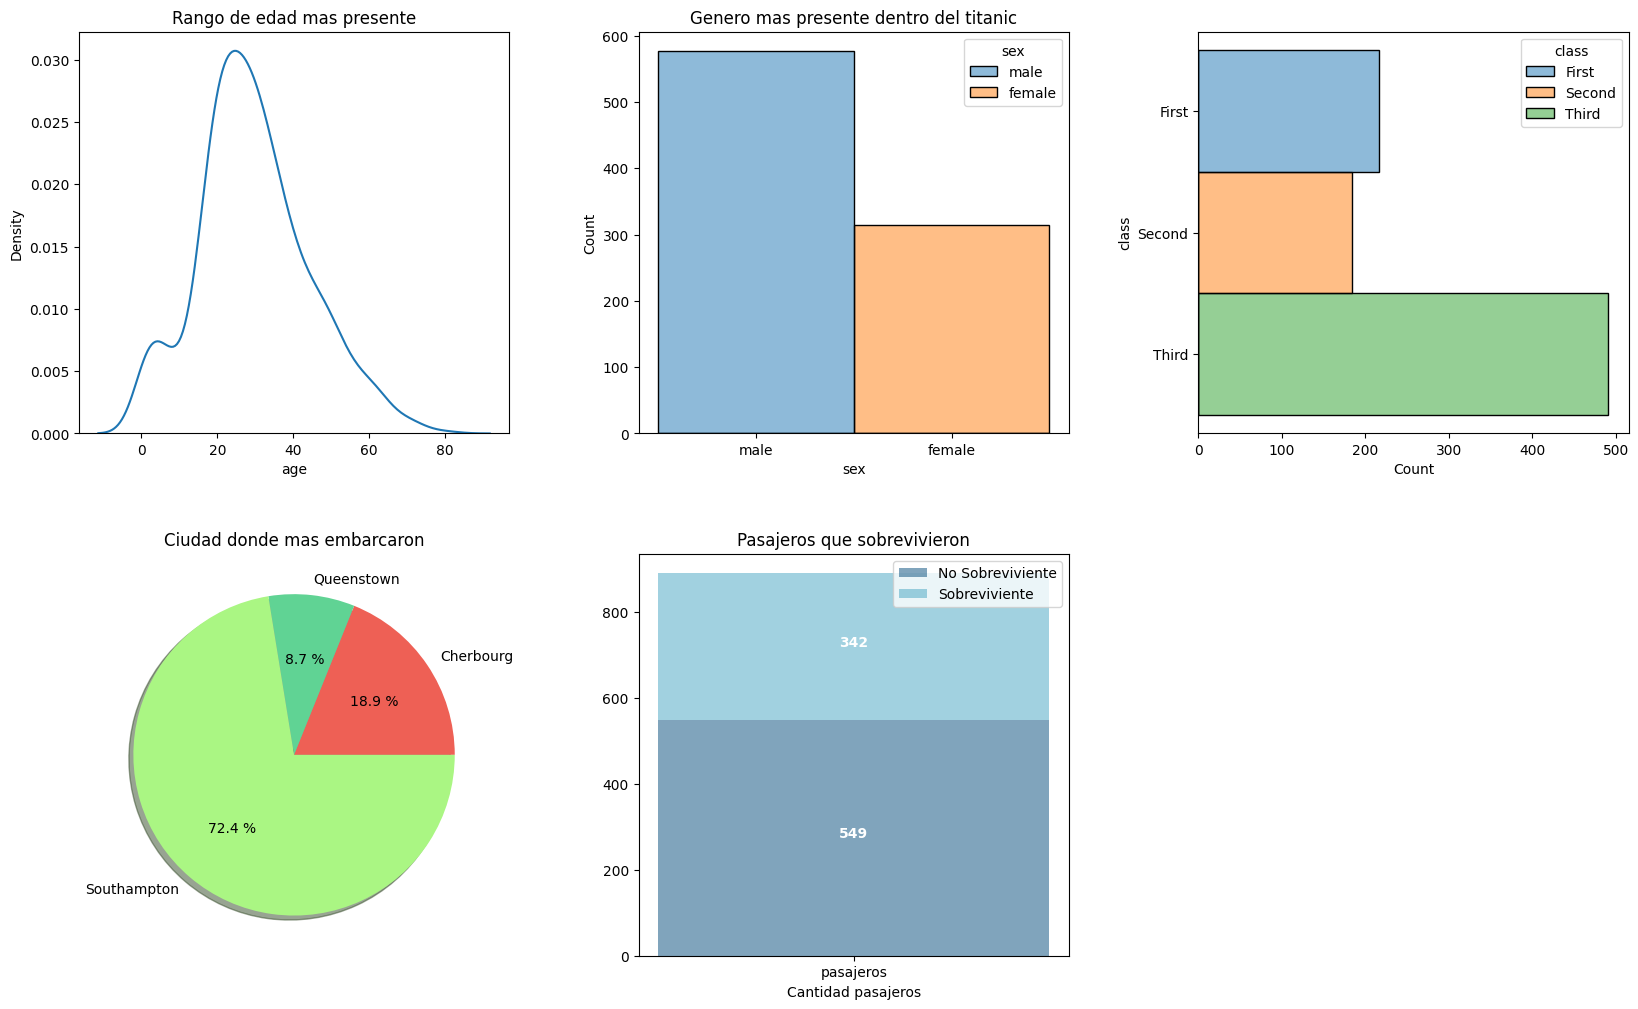

In [4]:

#Clasificar grupo edad

def clasificar_edad(edad):
    if(edad >=0 and edad<=10):
        return '0-10'
    if(edad >=11 and edad<=20):
        return '11-20'
    if(edad >=21 and edad<=30):
        return '21-30'
    if(edad >=31 and edad<=40):
        return '31-40'
    if(edad >=41 and edad<=50):
        return '41-50'
    if(edad >=51 and edad<=60):
        return '51-60'
    if(edad >=61 and edad<=70):
        return '61-70'
    if(edad >=71 and edad<=80):
        return '70+'
    

df['GrupoEdad'] = df['age'].apply(clasificar_edad)
df.to_csv('bd_titanic.csv')

#Creacion del lienzo
fig,ax = plt.subplots(2,3, figsize=(20,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

#Grafico rango edad mas frecuente
sns.kdeplot(data=df,x="age",ax=ax[0,0])
ax[0,0].set_title("Rango de edad mas presente")

#Edad mas frecuente hombres y mujeres dividido
sns.histplot(data=df,x="sex",ax=ax[0,1],hue='sex')
ax[0,1].set_title("Genero mas presente dentro del titanic")

#Nro pasajeros por clase
sns.histplot(data=df,y="class",ax=ax[0,2],hue='class')
ax[1,0].set_title("Pasajeros por clases")

#Ciudad donde mas se embarcaron
grouped = df.groupby(['embark_town']).size().reset_index()

colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
ax[1,0].pie(x=grouped[0], labels=grouped['embark_town'],autopct='%0.1f %%',colors=colores,shadow='true')
ax[1,0].set_title("Ciudad donde mas embarcaron")

#Personas que sobrevivieron y que no
#agrupar por sobrevivientos y no sobreviviente
grouped_alive = df.groupby(['alive']).size().reset_index()
grouped_alive['total'] = grouped_alive[0]
grouped_alive=grouped_alive.drop(columns=[0])

titulo= ['pasajeros']

ax[1,1].set_title('Pasajeros que sobrevivieron')
ax[1,1].bar(titulo,grouped_alive.loc[0,'total'],color = "#024b7a", alpha = 0.5,label='No Sobreviviente')
ax[1,1].bar(titulo,grouped_alive.loc[1,'total'],bottom = grouped_alive.loc[0,'total'], color = "#44a5c2", alpha = 0.5,label='Sobreviviente')
ax[1,1].legend(loc = 'upper right')
ax[1,1].set_xlabel('Cantidad pasajeros')

# Etiquetas
for bar in ax[1,1].patches:
  ax[1,1].text(bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2 + bar.get_y(),
        round(bar.get_height()), ha = 'center',
        color = 'w', weight = 'bold', size = 10)


#ETIQUETA CON ELTOTAL






ax[1,2].axis("off")

In [21]:
#
df.groupby(['embark_town','sex']).size().reset_index().pivot(columns='embark_town',index='sex',values=0)


embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,73,36,203
male,95,41,441


In [22]:
aa = df.groupby(['embark_town']).size().reset_index()
aa['total'] = aa[0]

data_embarque=aa.drop(columns=[0])

data_embarque.loc[len(data_embarque.index)] = ['total',data_embarque['total'].sum()]

data_embarque.set_index('embark_town')


,total
embark_town,
Cherbourg,168
Queenstown,77
Southampton,644
total,889


In [23]:

grouped_alive = df.groupby(['alive']).size().reset_index()
grouped_alive['total'] = grouped_alive[0]
grouped_alive=grouped_alive.drop(columns=[0])
grouped_alive


,alive,total
0,no,549
1,yes,342


C:\Users\mateo\AppData\Local\Temp\ipykernel_7528\1200214221.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sobrevivientes_agrupado_clases = sobrevivientes.groupby('class').size().reset_index()


Text(0.5, 1.0, 'Rango edad entre supervivientes')

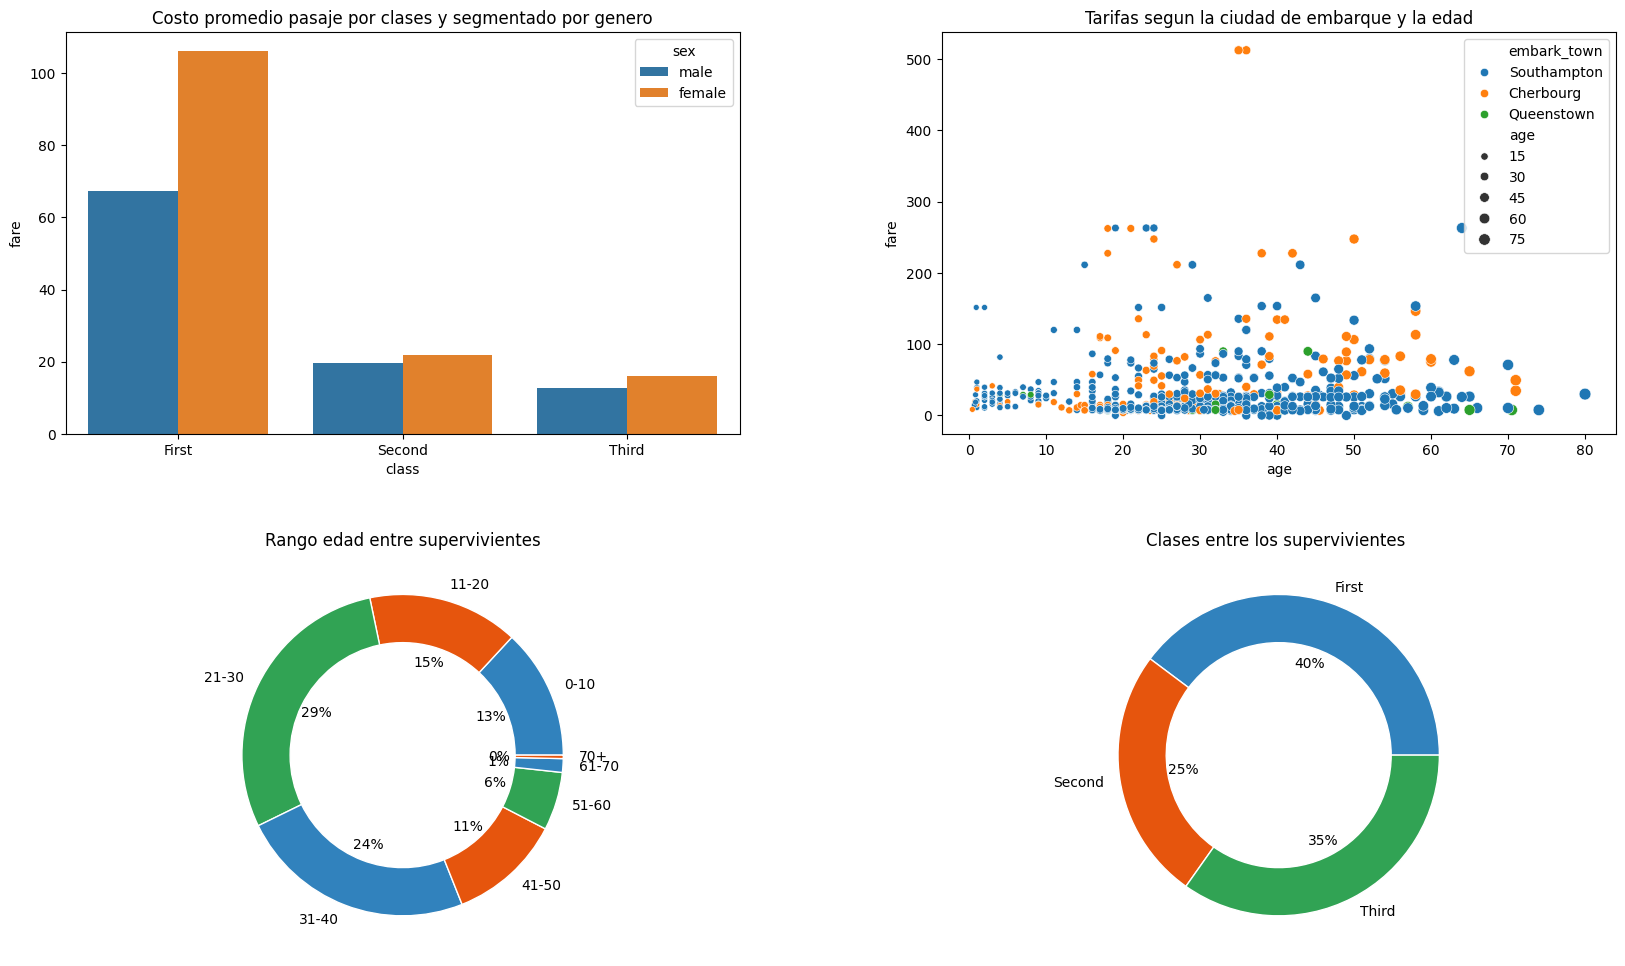

In [30]:
fig,ax = plt.subplots(2,2, figsize=(20,12))
plt.subplots_adjust(wspace=0.3,hspace=0.3)

#Tarifas(fare) segun las clases
#Tarifas segun genero

sns.barplot(data=df, x='class',y='fare',ax=ax[0,0],errorbar=None,hue=('sex'))
ax[0,0].set_title('Costo promedio pasaje por clases y segmentado por genero')


#Tarifas segun ciudad
#Tarifas segun la edad  
sns.scatterplot(data=df,x='age',y='fare',ax=ax[0,1],hue='embark_town',size='age')
ax[0,1].set_title('Tarifas segun la ciudad de embarque y la edad')

size = 0.3
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

#Sobrevivientes segun Clase
sobrevivientes = df[df['alive']=='yes']
sobrevivientes_agrupado_clases = sobrevivientes.groupby('class').size().reset_index()

ax[1,1].pie(sobrevivientes_agrupado_clases[0],labels=sobrevivientes_agrupado_clases['class'] , radius=1, colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'), autopct='%.0f%%')
ax[1,1].set_title('Clases entre los supervivientes ')



#Sobrevivientes segun edad
def clasificar_edad(edad):
    if(edad >=0 and edad<=10):
        return '0-10'
    if(edad >=11 and edad<=20):
        return '11-20'
    if(edad >=21 and edad<=30):
        return '21-30'
    if(edad >=31 and edad<=40):
        return '31-40'
    if(edad >=41 and edad<=50):
        return '41-50'
    if(edad >=51 and edad<=60):
        return '51-60'
    if(edad >=61 and edad<=70):
        return '61-70'
    if(edad >=71 and edad<=80):
        return '70+'

df['GrupoEdad'] = df['age'].apply(clasificar_edad)

sobrevivieron = df[df['alive']=='yes']
agrupados_edad_sobrevivientes = sobrevivieron.groupby('GrupoEdad').size().reset_index()


ax[1,0].pie(agrupados_edad_sobrevivientes[0],labels=agrupados_edad_sobrevivientes['GrupoEdad'] , radius=1, colors=outer_colors,wedgeprops=dict(width=size, edgecolor='w'), autopct='%.0f%%')
ax[1,0].set_title('Rango edad entre supervivientes')



Text(0.5, 1.0, 'Sobrevivientes segun ciudad en la que embarcaron')

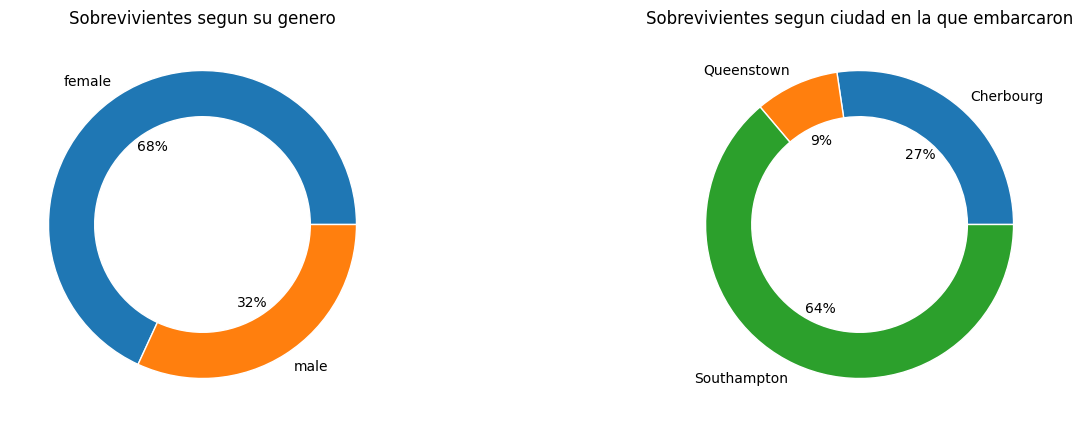

In [58]:
#Sobrevivientes segun genero
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

vivos = df[df['alive']=='yes']
grouped_sex = vivos.groupby('sex').size().reset_index()


ax[0].pie(grouped_sex[0],labels=grouped_sex['sex'], radius=1,autopct='%.0f%%',wedgeprops=dict(width=size, edgecolor='w'))
ax[0].set_title('Sobrevivientes segun su genero')

grouped_embark = vivos.groupby('embark_town').size().reset_index()

#Sobrevivientes segun donde embarcaron
ax[1].pie(grouped_embark[0],labels=grouped_embark['embark_town'], radius=1,autopct='%.0f%%',wedgeprops=dict(width=size, edgecolor='w'))
ax[1].set_title('Sobrevivientes segun ciudad en la que embarcaron')



<Axes: xlabel='embark_town', ylabel='Count'>

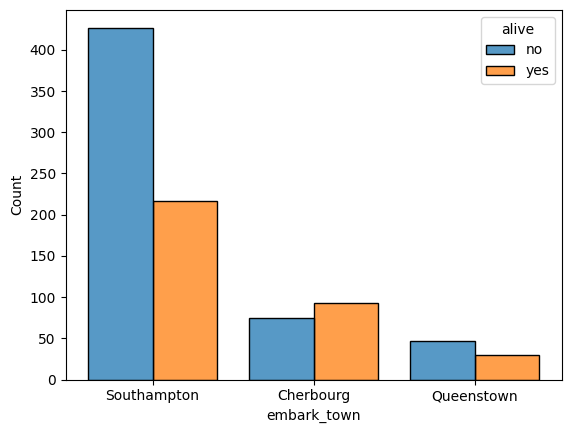

In [73]:
#Cuantos sobrevivieron de cada ciudad donde embarcaron




sns.histplot(data=df, x='embark_town',hue='alive',multiple="dodge",shrink=.8)
